In [1]:
spark = SparkSession.builder \
   .master("local") \
   .appName("RecommendationEngine") \
   .config("spark.executor.memory", "6gb") \
   .getOrCreate()

In [2]:
import os
os.listdir('ml-latest-small/')

['tags.csv', 'links.csv', 'README.txt', 'ratings.csv', 'movies.csv']

In [3]:
movies = spark.read.format('com.databricks.spark.csv')\
            .options(header='true', inferschema='true')\
            .load('ml-latest-small/movies.csv')
tags = spark.read.format('com.databricks.spark.csv')\
            .options(header='true', inferschema='true')\
            .load('ml-latest-small/tags.csv')
links = spark.read.format('com.databricks.spark.csv')\
            .options(header='true', inferschema='true')\
            .load('ml-latest-small/links.csv')
ratings = spark.read.format('com.databricks.spark.csv')\
            .options(header='true', inferschema='true')\
            .load('ml-latest-small/ratings.csv')

In [4]:
ratings.columns

['userId', 'movieId', 'rating', 'timestamp']

In [5]:
ratings.show(truncate=False)

+------+-------+------+----------+
|userId|movieId|rating|timestamp |
+------+-------+------+----------+
|1     |31     |2.5   |1260759144|
|1     |1029   |3.0   |1260759179|
|1     |1061   |3.0   |1260759182|
|1     |1129   |2.0   |1260759185|
|1     |1172   |4.0   |1260759205|
|1     |1263   |2.0   |1260759151|
|1     |1287   |2.0   |1260759187|
|1     |1293   |2.0   |1260759148|
|1     |1339   |3.5   |1260759125|
|1     |1343   |2.0   |1260759131|
|1     |1371   |2.5   |1260759135|
|1     |1405   |1.0   |1260759203|
|1     |1953   |4.0   |1260759191|
|1     |2105   |4.0   |1260759139|
|1     |2150   |3.0   |1260759194|
|1     |2193   |2.0   |1260759198|
|1     |2294   |2.0   |1260759108|
|1     |2455   |2.5   |1260759113|
|1     |2968   |1.0   |1260759200|
|1     |3671   |3.0   |1260759117|
+------+-------+------+----------+
only showing top 20 rows



In [6]:
tags.show(truncate = False)

+------+-------+-----------------------+----------+
|userId|movieId|tag                    |timestamp |
+------+-------+-----------------------+----------+
|15    |339    |sandra 'boring' bullock|1138537770|
|15    |1955   |dentist                |1193435061|
|15    |7478   |Cambodia               |1170560997|
|15    |32892  |Russian                |1170626366|
|15    |34162  |forgettable            |1141391765|
|15    |35957  |short                  |1141391873|
|15    |37729  |dull story             |1141391806|
|15    |45950  |powerpoint             |1169616291|
|15    |100365 |activist               |1425876220|
|15    |100365 |documentary            |1425876220|
|15    |100365 |uganda                 |1425876220|
|23    |150    |Ron Howard             |1148672905|
|68    |2174   |music                  |1249808064|
|68    |2174   |weird                  |1249808102|
|68    |8623   |Steve Martin           |1249808497|
|73    |107999 |action                 |1430799184|
|73    |1079

In [7]:
movies.select('genres').distinct().show(truncate = False)

+------------------------------------------+
|genres                                    |
+------------------------------------------+
|Comedy|Horror|Thriller                    |
|Adventure|Sci-Fi|Thriller                 |
|Action|Adventure|Drama|Fantasy            |
|Action|Drama|Horror                       |
|Comedy|Drama|Horror|Thriller              |
|Action|Animation|Comedy|Sci-Fi            |
|Animation|Children|Drama|Musical|Romance  |
|Action|Adventure|Drama                    |
|Adventure|Animation                       |
|Adventure|Sci-Fi                          |
|Documentary|Musical|IMAX                  |
|Adventure|Children|Fantasy|Sci-Fi|Thriller|
|Documentary|Sci-Fi                        |
|Musical|Romance|War                       |
|Action|Adventure|Fantasy|Romance          |
|Adventure|Children|Drama|Fantasy|IMAX     |
|Crime|Drama|Fantasy|Horror|Thriller       |
|Comedy|Mystery|Thriller                   |
|Adventure|Fantasy                         |
|Action|An

In [8]:
links.show()

+-------+------+------+
|movieId|imdbId|tmdbId|
+-------+------+------+
|      1|114709|   862|
|      2|113497|  8844|
|      3|113228| 15602|
|      4|114885| 31357|
|      5|113041| 11862|
|      6|113277|   949|
|      7|114319| 11860|
|      8|112302| 45325|
|      9|114576|  9091|
|     10|113189|   710|
|     11|112346|  9087|
|     12|112896| 12110|
|     13|112453| 21032|
|     14|113987| 10858|
|     15|112760|  1408|
|     16|112641|   524|
|     17|114388|  4584|
|     18|113101|     5|
|     19|112281|  9273|
|     20|113845| 11517|
+-------+------+------+
only showing top 20 rows



In [9]:
print('The number of rows in movies dataset is {}'.format(movies.toPandas().shape[0]))
print('The number of rows in ratings dataset is {}'.format(ratings.toPandas().shape[0]))
print('The number of rows in tags dataset is {}'.format(tags.toPandas().shape[0]))
print('The number of rows in links dataset is {}'.format(links.toPandas().shape[0]))

The number of rows in movies dataset is 9125
The number of rows in ratings dataset is 100004
The number of rows in tags dataset is 1296
The number of rows in links dataset is 9125


In [10]:
for i in ratings.columns:
    ratings = ratings.withColumnRenamed(i, i+'_1')    

In [11]:
ratings.show()

+--------+---------+--------+-----------+
|userId_1|movieId_1|rating_1|timestamp_1|
+--------+---------+--------+-----------+
|       1|       31|     2.5| 1260759144|
|       1|     1029|     3.0| 1260759179|
|       1|     1061|     3.0| 1260759182|
|       1|     1129|     2.0| 1260759185|
|       1|     1172|     4.0| 1260759205|
|       1|     1263|     2.0| 1260759151|
|       1|     1287|     2.0| 1260759187|
|       1|     1293|     2.0| 1260759148|
|       1|     1339|     3.5| 1260759125|
|       1|     1343|     2.0| 1260759131|
|       1|     1371|     2.5| 1260759135|
|       1|     1405|     1.0| 1260759203|
|       1|     1953|     4.0| 1260759191|
|       1|     2105|     4.0| 1260759139|
|       1|     2150|     3.0| 1260759194|
|       1|     2193|     2.0| 1260759198|
|       1|     2294|     2.0| 1260759108|
|       1|     2455|     2.5| 1260759113|
|       1|     2968|     1.0| 1260759200|
|       1|     3671|     3.0| 1260759117|
+--------+---------+--------+-----

In [12]:
temp1 = ratings.join(movies, ratings.movieId_1 == movies.movieId, how = 'inner')

In [13]:
temp2 = temp1.join(links, temp1.movieId_1 == links.movieId, how = 'inner')

In [14]:
mainDF = temp2.join(tags, (temp2.userId_1 == tags.userId) &
                    (temp2.movieId_1 == tags.movieId), how = 'left')

In [15]:
print(temp1.count())
print(temp2.count())
print(mainDF.count())

100004
100004
100441


In [16]:
mainDF.groupBy(['tag']).agg({'rating_1':'count'})\
            .withColumnRenamed('count(rating_1)', 'Row Count').orderBy(["Row Count"],ascending=False)\
            .show()

+------------+---------+
|         tag|Row Count|
+------------+---------+
|        null|    99502|
|   toplist07|       22|
|   toplist12|       18|
|   toplist11|       16|
|   toplist15|       16|
|   toplist10|       16|
|   toplist09|       15|
|   toplist06|       15|
|   toplist08|       15|
|   toplist13|       14|
|       funny|       13|
|   toplist14|       13|
|twist ending|       12|
|       anime|       10|
|      sci-fi|       10|
|      comedy|       10|
|      quirky|        8|
|martial arts|        8|
| dark comedy|        7|
|  psychology|        7|
+------------+---------+
only showing top 20 rows



In [17]:
mainDF.columns

['userId_1',
 'movieId_1',
 'rating_1',
 'timestamp_1',
 'movieId',
 'title',
 'genres',
 'movieId',
 'imdbId',
 'tmdbId',
 'userId',
 'movieId',
 'tag',
 'timestamp']

In [18]:
mainDF = mainDF.select('userId_1','movieId_1','rating_1','title','genres', 'imdbId','tmdbId', 'timestamp_1')\
               .distinct()

In [19]:
mainDF.count()

100004

In [20]:
movies.createOrReplaceTempView('movies_')
links.createOrReplaceTempView('links_')
ratings.createOrReplaceTempView('ratings_')

In [21]:
mainDF_SQL = \
sqlContext.sql(
"""
select
r.userId_1
,r.movieId_1
,r.rating_1
,m.title
,m.genres
,l.imdbId
,l.tmdbId
,r.timestamp_1
from ratings_ r
inner join movies_ m on 
r.movieId_1 =  m.movieId
inner join links_ l on 
r.movieId_1 = l.movieId
"""
)

In [22]:
mainDF_SQL.show(n =  5)

+--------+---------+--------+--------------------+--------------------+------+------+-----------+
|userId_1|movieId_1|rating_1|               title|              genres|imdbId|tmdbId|timestamp_1|
+--------+---------+--------+--------------------+--------------------+------+------+-----------+
|       1|       31|     2.5|Dangerous Minds (...|               Drama|112792|  9909| 1260759144|
|       1|     1029|     3.0|        Dumbo (1941)|Animation|Childre...| 33563| 11360| 1260759179|
|       1|     1061|     3.0|     Sleepers (1996)|            Thriller|117665|   819| 1260759182|
|       1|     1129|     2.0|Escape from New Y...|Action|Adventure|...| 82340|  1103| 1260759185|
|       1|     1172|     4.0|Cinema Paradiso (...|               Drama| 95765| 11216| 1260759205|
+--------+---------+--------+--------------------+--------------------+------+------+-----------+
only showing top 5 rows



In [23]:
mainDF_SQL.count()

100004

In [24]:
mainDF.describe('rating_1').show()

+-------+------------------+
|summary|          rating_1|
+-------+------------------+
|  count|            100004|
|   mean| 3.543608255669773|
| stddev|1.0580641091070384|
|    min|               0.5|
|    max|               5.0|
+-------+------------------+



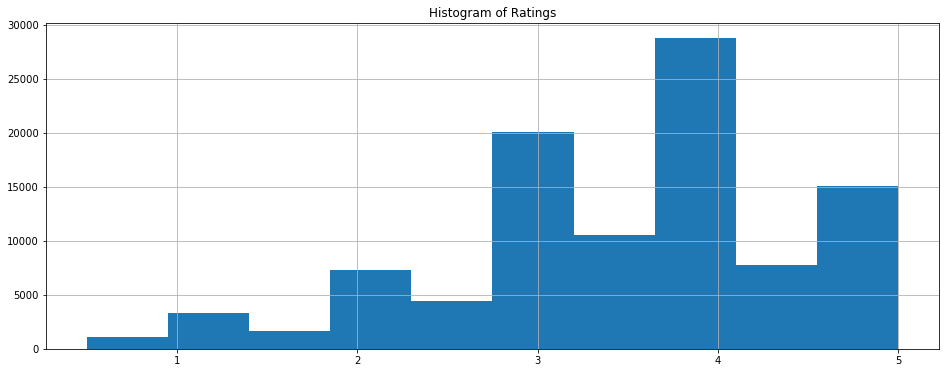

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

mainDF.select('rating_1').toPandas().hist(figsize=(16, 6), grid=True)
plt.title('Histogram of Ratings')
plt.show()

In [26]:
mainDF.groupBy(['rating_1']).agg({'rating_1':'count'})\
            .withColumnRenamed('count(rating_1)', 'Row Count').orderBy(["Row Count"],ascending=False)\
            .show()

+--------+---------+
|rating_1|Row Count|
+--------+---------+
|     4.0|    28750|
|     3.0|    20064|
|     5.0|    15095|
|     3.5|    10538|
|     4.5|     7723|
|     2.0|     7271|
|     2.5|     4449|
|     1.0|     3326|
|     1.5|     1687|
|     0.5|     1101|
+--------+---------+



In [27]:
userId_frequency = mainDF.groupBy(['userId_1']).agg({'rating_1':'count'})\
            .withColumnRenamed('count(rating_1)', '# of Reviews')\
            .orderBy(["# of Reviews"],ascending=False)

In [28]:
userId_frequency.show()

+--------+------------+
|userId_1|# of Reviews|
+--------+------------+
|     547|        2391|
|     564|        1868|
|     624|        1735|
|      15|        1700|
|      73|        1610|
|     452|        1340|
|     468|        1291|
|     380|        1063|
|     311|        1019|
|      30|        1011|
|     294|         947|
|     509|         923|
|     580|         922|
|     213|         910|
|     212|         876|
|     472|         830|
|     388|         792|
|      23|         726|
|     457|         713|
|     518|         707|
+--------+------------+
only showing top 20 rows



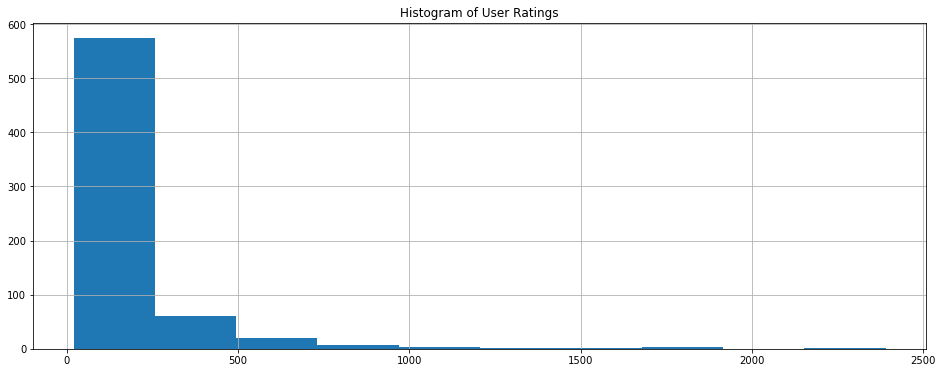

In [29]:
userId_frequency.select('# of Reviews').toPandas().hist(figsize=(16, 6), grid=True)
plt.title('Histogram of User Ratings')
plt.show()

In [30]:
mainDF = mainDF.withColumnRenamed('userId_1', 'userid')
mainDF = mainDF.withColumnRenamed('movieId_1', 'movieid')
mainDF = mainDF.withColumnRenamed('rating_1', 'rating')
mainDF = mainDF.withColumnRenamed('timestamp_1', 'timestamp')
mainDF = mainDF.withColumnRenamed('imdbId', 'imdbid')
mainDF = mainDF.withColumnRenamed('tmdbId', 'tmdbid')

In [31]:
mainDF.columns

['userid',
 'movieid',
 'rating',
 'title',
 'genres',
 'imdbid',
 'tmdbid',
 'timestamp']

In [32]:
import pyspark.sql.functions as F
mainDF = mainDF.withColumn("rating", F.round(mainDF["rating"], 0))

In [33]:
from pyspark.ml.feature import StringIndexer
string_indexer = StringIndexer(inputCol="genres", outputCol="genreCount")
mainDF = string_indexer.fit(mainDF).transform(mainDF)
mainDF.show()

+------+-------+------+--------------------+--------------------+-------+------+----------+----------+
|userid|movieid|rating|               title|              genres| imdbid|tmdbid| timestamp|genreCount|
+------+-------+------+--------------------+--------------------+-------+------+----------+----------+
|     2|    367|   3.0|    Mask, The (1994)|Action|Comedy|Cri...| 110475|   854| 835355619|     119.0|
|     4|    913|   5.0|Maltese Falcon, T...|   Film-Noir|Mystery|  33870|   963| 949919247|     231.0|
|     4|   1344|   5.0|    Cape Fear (1962)|Crime|Drama|Thriller|  55824| 11349| 949919247|      15.0|
|     4|   2454|   5.0|     Fly, The (1958)|Horror|Mystery|Sc...|  51622| 11815| 949982274|     448.0|
|     4|   2986|   3.0|    RoboCop 2 (1990)|Action|Crime|Sci-...| 100502|  5549| 949896015|     406.0|
|    15|   3755|   2.0|Perfect Storm, Th...|      Drama|Thriller| 177971|  2133|1416119541|      11.0|
|    15|   3994|   4.0|  Unbreakable (2000)|        Drama|Sci-Fi| 217869|

In [34]:
mainDF = mainDF.select('rating', 'userid', 'movieid', 'imdbid', 'tmdbid', 'timestamp', 'genreCount')

In [35]:
mainDF.show()

+------+------+-------+-------+------+----------+----------+
|rating|userid|movieid| imdbid|tmdbid| timestamp|genreCount|
+------+------+-------+-------+------+----------+----------+
|   3.0|     2|    367| 110475|   854| 835355619|     119.0|
|   5.0|     4|    913|  33870|   963| 949919247|     231.0|
|   5.0|     4|   1344|  55824| 11349| 949919247|      15.0|
|   5.0|     4|   2454|  51622| 11815| 949982274|     448.0|
|   3.0|     4|   2986| 100502|  5549| 949896015|     406.0|
|   2.0|    15|   3755| 177971|  2133|1416119541|      11.0|
|   4.0|    15|   3994| 217869|  9741| 997937442|      65.0|
|   3.0|    15|   5956| 217505|  3131|1163876422|       6.0|
|   3.0|    15|  71282|1286537| 18570|1465793912|      13.0|
|   1.0|    15| 110553|1872181|102382|1416120149|     238.0|
|   3.0|    15| 152081|2948356|269149|1460076733|     126.0|
|   4.0|    16|    527| 108052|   424|1178364921|      12.0|
|   3.0|    19|    805| 117913|  1645| 855190199|      11.0|
|   4.0|    19|   1073| 

In [36]:
trainDF, testDF = mainDF.randomSplit([0.8, 0.2], seed=1234)

In [37]:
print('The number of rows in mainDF is {}'.format(mainDF.count()))
print('The number of rows in trainDF is {}'.format(trainDF.count()))
print('The number of rows in testDF is {}'.format(testDF.count()))

The number of rows in mainDF is 100004
The number of rows in trainDF is 80146
The number of rows in testDF is 19858


In [38]:
import numpy as np
xtrain_array = np.array(trainDF.select('userid','movieid', 'genreCount').collect())
xtest_array = np.array(testDF.select('userid','movieid', 'genreCount').collect())

In [39]:
ytrain_array = np.array(trainDF.select('rating').collect())
ytest_array = np.array(testDF.select('rating').collect())

In [40]:
print(xtest_array.shape)
print(ytest_array.shape)
print(xtrain_array.shape)
print(ytrain_array.shape)

(19858, 3)
(19858, 1)
(80146, 3)
(80146, 1)


In [41]:
import keras.utils as u
ytrain_OHE = u.to_categorical(ytrain_array)
ytest_OHE = u.to_categorical(ytest_array)

Using TensorFlow backend.


In [42]:
print(ytrain_OHE.shape)
print(ytest_OHE.shape)

(80146, 6)
(19858, 6)


In [43]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [44]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=xtrain_array.shape[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(ytrain_OHE.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
accuracy_history = model.fit(xtrain_array, ytrain_OHE, epochs=20, batch_size=32)

Epoch 1/20
80146/80146 [==============================] - 4s 45us/step - loss: 4.4843 - acc: 0.3385
Epoch 2/20
80146/80146 [==============================] - 4s 56us/step - loss: 1.4123 - acc: 0.3939
Epoch 3/20
80146/80146 [==============================] - 4s 46us/step - loss: 1.4056 - acc: 0.3939
Epoch 4/20
80146/80146 [==============================] - 3s 43us/step - loss: 1.4037 - acc: 0.3939
Epoch 5/20
80146/80146 [==============================] - 3s 42us/step - loss: 1.4031 - acc: 0.3939
Epoch 6/20
80146/80146 [==============================] - 3s 43us/step - loss: 1.4028 - acc: 0.3939
Epoch 7/20
80146/80146 [==============================] - 3s 43us/step - loss: 1.4028 - acc: 0.3939
Epoch 8/20
80146/80146 [==============================] - 4s 45us/step - loss: 1.4028 - acc: 0.3939
Epoch 9/20
80146/80146 [==============================] - 4s 53us/step - loss: 1.4027 - acc: 0.3939
Epoch 10/20
80146/80146 [==============================] - 4s 44us/step - loss: 1.4027 - acc: 0.3939

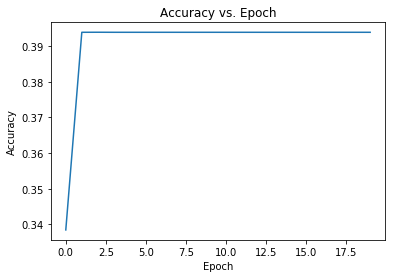

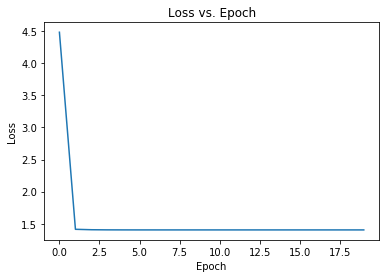

In [46]:
plt.plot(accuracy_history.history['acc'])
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
plt.plot(accuracy_history.history['loss'])
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [47]:
score = model.evaluate(xtest_array, ytest_OHE, batch_size=128)
accuracy_rate = score[1]*100
print('accuracy is {}%'.format(round(accuracy_rate,2)))

19858/19858 [==============================] - 0s 9us/step
accuracy is 38.87%
